In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.style.use('../../sim.mplstyle')
%config InlineBackend.figure_format = 'retina'

/tmp/ipykernel_2206/3154782594.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return -self._cumulmassfunc(r)*R/r**3.



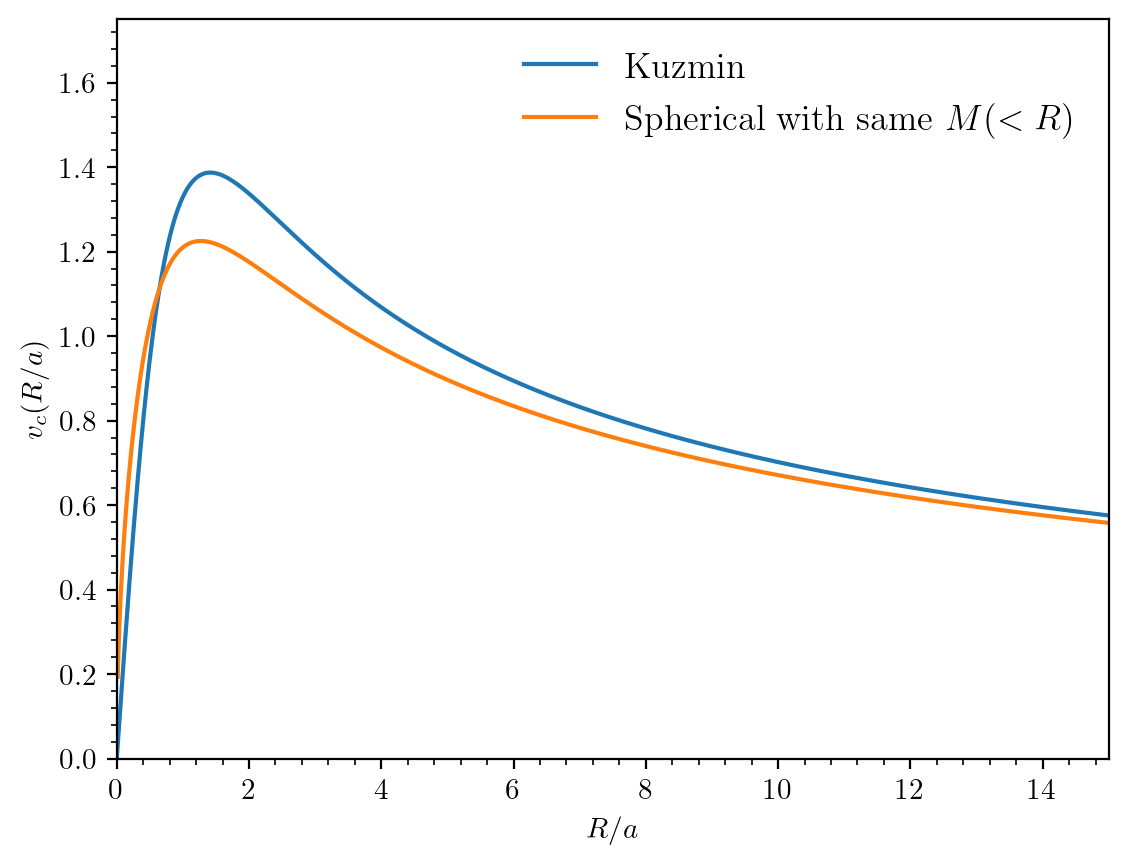

In [11]:
from galpy import potential
class EquivalentMassSphericalPotential(potential.Potential):
    def __init__(self,amp=1.,cumulmassfunc=None,ro=None,vo=None):
        potential.Potential.__init__(self,amp=amp,ro=ro,vo=vo)
        self._cumulmassfunc= cumulmassfunc
    def _Rforce(self,R,z,phi=0.,t=0.):
        r= np.sqrt(R**2.+z**2.)
        return -self._cumulmassfunc(r)*R/r**3.
    

from galpy import potential
a= 1.
kzp= potential.KuzminDiskPotential(amp=5.,a=a)
kzp_spher= EquivalentMassSphericalPotential(amp=5.,\
                cumulmassfunc=lambda R: 1.-a/np.sqrt(R**2+a**2))
line_kuzmin= kzp.plotRotcurve(Rrange=[0.,15.],\
                label=r'$\mathrm{Kuzmin}$',yrange=[0.,1.75],
                xlabel=r'$R/a$',ylabel=r'$v_c(R/a)$')
line_kuzmin_spher= kzp_spher.plotRotcurve(Rrange=[0.,15.],\
                label=r'$\mathrm{Spherical\ with\ same}\ M(<R)$',
                overplot=True)
plt.legend(handles=[line_kuzmin[0],line_kuzmin_spher[0]],
       fontsize=13,loc='upper right',frameon=False);

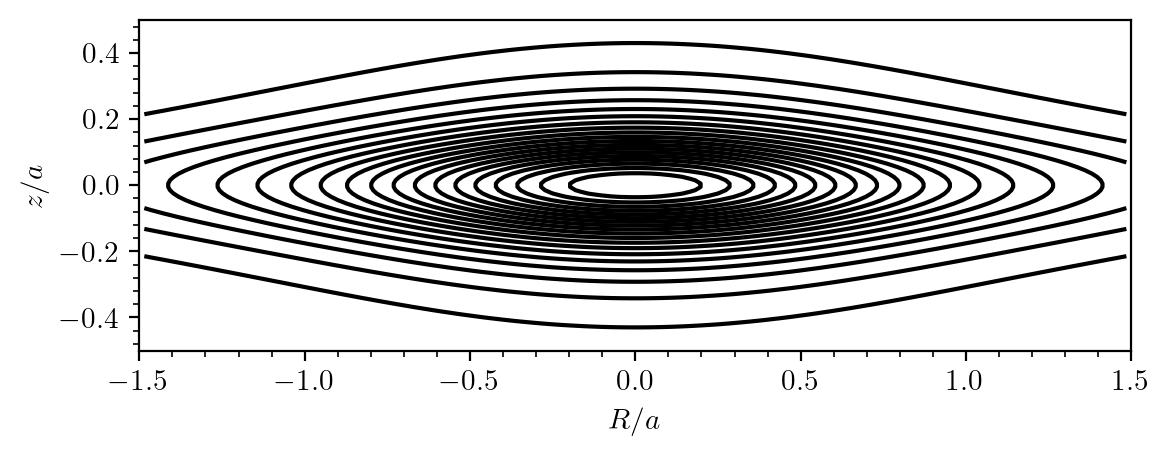

In [29]:
from galpy import potential
mnp= potential.MiyamotoNagaiPotential(amp=10.,a=1.,b=0.2)
mnp.plotDensity(justcontours=True,rmin=-1.5,rmax=1.5,nrs=100,nzs=100)

plt.gca().set_aspect('equal')
plt.xlabel(r'$R/a$')
plt.ylabel(r'$z/a$');

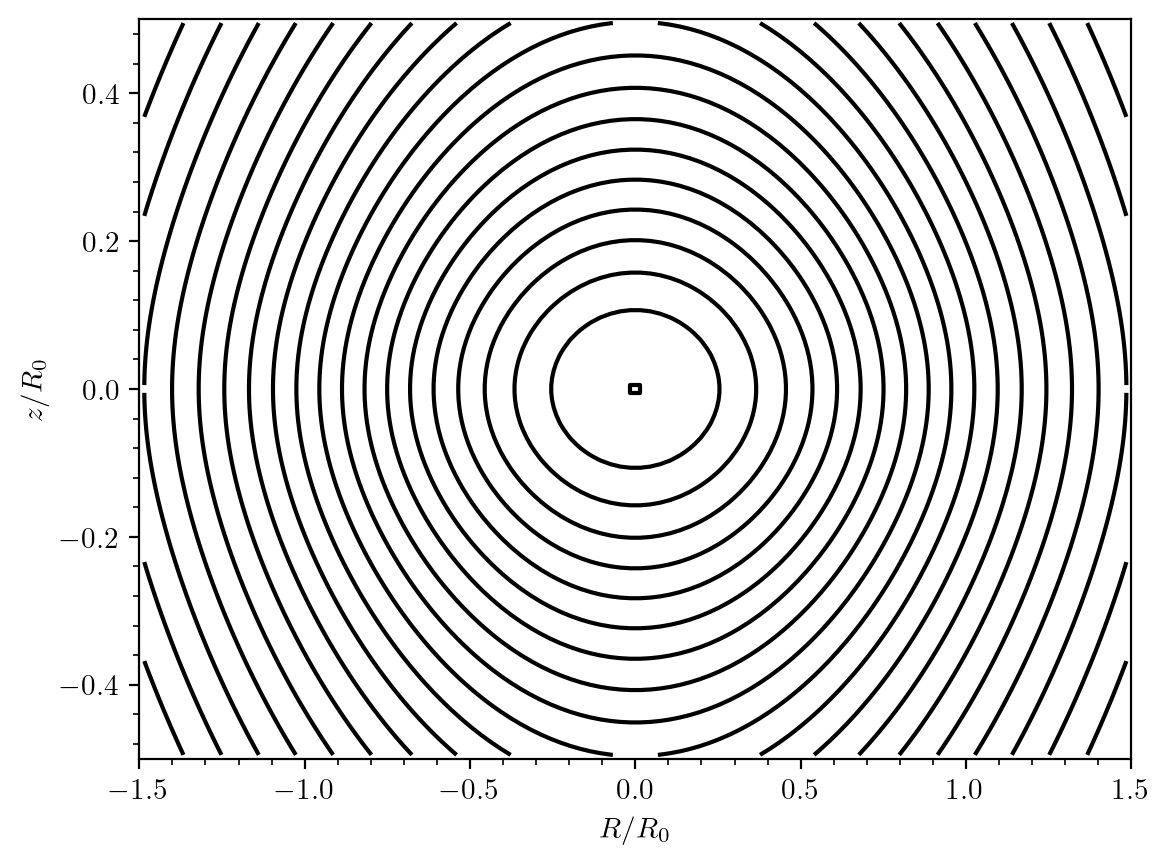

In [27]:
mnp.plot(justcontours=True,rmin=-1.5,rmax=1.5,nrs=100,nzs=100);